In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

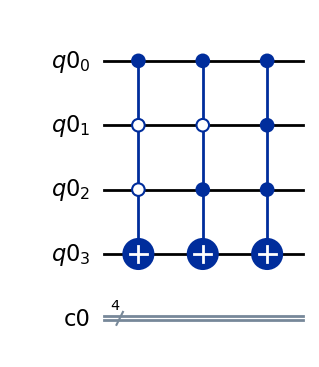

In [2]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.circuit.library import MCXGate

qr = QuantumRegister(4)
cr = ClassicalRegister(4)

qc = QuantumCircuit(qr, cr, name='q')

qc.append(MCXGate(3, ctrl_state=1), qr)
qc.append(MCXGate(3, ctrl_state=5), qr)
qc.append(MCXGate(3, ctrl_state=7), qr)

qc.draw(output='mpl')

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import MCXGate


def oracle(f_outputs): 
    
    n = int(np.log2(len(f_outputs)))  #dimension del registro de entrada |x> 
    m = len(f_outputs[0])             #dimension del registro de salida |f(x)>
    
    #generamos todos los posibles inputs en binario, completando con ceros hasta tener strings de n bits
    inputs = [format(i, 'b').zfill(n) for i in range(2**n)]
    print(inputs)
    
    qr_input = QuantumRegister(n, name='input')
    qr_output = QuantumRegister(m, name='output')
    qc = QuantumCircuit(qr_input, qr_output)


    # Hacemos un bucle sobre los inputs
    for i,input_str in enumerate(inputs):
        ctrl_state= int(input_str[::],2)
        print(i, ctrl_state)
        # Para cada input, i, haz un bucle sobre cada bit del output     
        for j,output_bit in enumerate(f_outputs[i]):
###
            if output_bit =='1':
                qc.append(MCXGate(len(input_str), ctrl_state=ctrl_state),qr_input[:]+[qr_output[n-j-1]])  

    return qc

In [4]:
 
f_outputs = ['1111', '1011', '0011', '1000', '0101', '0100', 
               '0000', '1110', '0101', '0100', '0000', '1110', 
               '1111', '1011', '0011', '1000']

f_outputs= ['000', '001', '010', '011', '100', '101', '110', '111']
    

    
oracle(f_outputs).draw()



['000', '001', '010', '011', '100', '101', '110', '111']
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7


input_0: ──■────o────■────■────o────■────■────o────o────■────■────■──
            │    │    │    │    │    │    │    │    │    │    │    │  
 input_1: ──o────■────■────■────o────o────o────■────■────■────■────■──
            │    │    │    │    │    │    │    │    │    │    │    │  
 input_2: ──o────o────o────o────■────■────■────■────■────■────■────■──
          ┌─┴─┐  │    │  ┌─┴─┐  │    │  ┌─┴─┐  │    │    │    │  ┌─┴─┐
output_0: ┤ X ├──┼────┼──┤ X ├──┼────┼──┤ X ├──┼────┼────┼────┼──┤ X ├
          └───┘┌─┴─┐┌─┴─┐└───┘  │    │  └───┘  │  ┌─┴─┐  │  ┌─┴─┐└───┘
output_1: ─────┤ X ├┤ X ├───────┼────┼─────────┼──┤ X ├──┼──┤ X ├─────
               └───┘└───┘     ┌─┴─┐┌─┴─┐     ┌─┴─┐└───┘┌─┴─┐└───┘     
output_2: ────────────────────┤ X ├┤ X ├─────┤ X ├─────┤ X ├──────────
                              └───┘└───┘     └───┘     └───┘

['000', '001', '010', '011', '100', '101', '110', '111']
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7


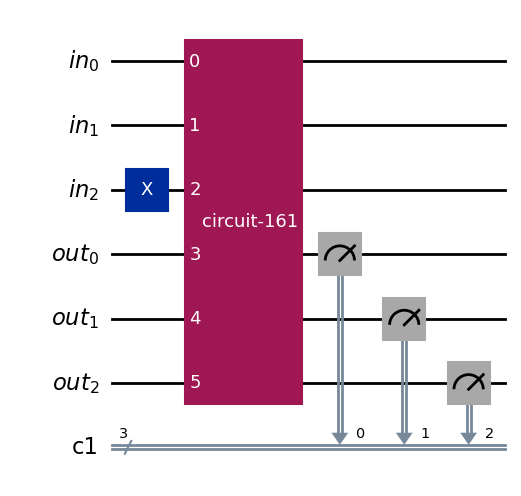

In [5]:
n=3
qr_in = QuantumRegister(n, name='in')
qr_out = QuantumRegister(n, name='out')
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr_in,qr_out,cr)


qc.x(2)
qc.append(oracle(f_outputs).to_gate(),qr_in[:]+qr_out[:])
qc.measure(qr_out,cr)

qc.draw('mpl')

In [6]:
from qiskit import Aer, execute
M_backend = Aer.get_backend('qasm_simulator')

job = execute(qc,M_backend,shots=1)
job.result().get_counts()


ImportError: cannot import name 'Aer' from 'qiskit' (/Users/javier/opt/anaconda3/envs/TalentQ2/lib/python3.11/site-packages/qiskit/__init__.py)

In [7]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister

def linear_circuit(x,a):
       
    assert(len(x)==len(a))

    # Inicialización de los registros
    qr_in = QuantumRegister(len(a), name='qr_in')
    qr_out = QuantumRegister(1, name='qr_out')
    cr = ClassicalRegister(1, name='cr')  
    qc = QuantumCircuit(qr_in, qr_out, cr, name='q_linear')
    
    'inicializamo el estado x '
    for i, xq in enumerate(reversed(x)):  # ojo con la ordenación de qiskit, por eso está reversed()
        if xq == '1':
             qc.x(qr_in[i]) 

    qc.barrier()

    'codificamos la función lineal x.a '
###
#
#        Tu solución aquí
#
#
####
            
    qc.barrier()
    qc.measure(qr_out[0],cr[0])
    
    return qc 

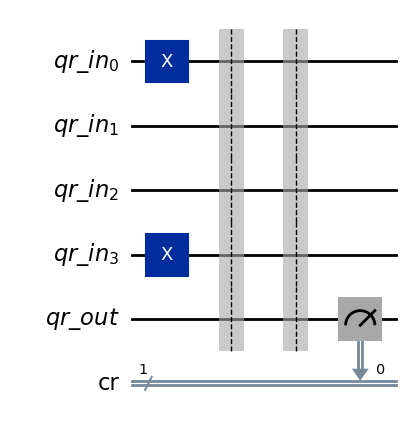

In [8]:
a = '1011'
x = '1001'

qc=linear_circuit(x,a)
qc.draw('mpl')

In [9]:
from qiskit import Aer, execute
n_tiradas = 1

M_backend = Aer.get_backend('qasm_simulator')
counts     = execute(qc, M_backend, shots = n_tiradas).result().get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

ImportError: cannot import name 'Aer' from 'qiskit' (/Users/javier/opt/anaconda3/envs/TalentQ2/lib/python3.11/site-packages/qiskit/__init__.py)